In [16]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer

%matplotlib inline

In [2]:
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 'Quora question matches.ipynb',
 'sample_submission.csv',
 'sample_submission.csv.zip',
 'submission_1.csv',
 'submission_2.csv',
 'test.csv',
 'test.csv.zip',
 'train.csv',
 'train.csv.zip']

In [3]:
train_qs = pd.read_csv('train.csv')
test_qs = pd.read_csv('test.csv')

test_qs.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [4]:
pd.set_option('display.max_rows', 20)

In [5]:
train_qs

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [7]:
print train_qs.loc[0,'question1']
print train_qs.loc[0,'question2']
print train_qs.loc[0,'is_duplicate']

#To be noted: The questions even though are equal word-to-word till 'market', 'in india' makes the difference

What is the step by step guide to invest in share market in india?
What is the step by step guide to invest in share market?
0


In [8]:
print train_qs.loc[8,'question1']
print train_qs.loc[8,'question2']
print train_qs.loc[8,'is_duplicate']

#To be noted: Special characters are causing the difference. So, just removing the special charaters will not help

When do you use シ instead of し?
When do you use "&" instead of "and"?
0


In [9]:
train_qs.shape #400,000 records in total

(404290, 6)

In [10]:
#Analysing the duplicate questions
train_qs[train_qs['is_duplicate']==1]

,id,qid1,qid2,question1,question2,is_duplicate
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
11,11,23,24,How do I read and find my YouTube comments?,How can I see all my Youtube comments?,1
12,12,25,26,What can make Physics easy to learn?,How can you make physics easy to learn?,1
13,13,27,28,What was your first sexual experience like?,What was your first sexual experience?,1
...,...,...,...,...,...,...
404280,404280,537922,537923,What are some outfit ideas to wear to a frat p...,What are some outfit ideas wear to a frat them...,1
404281,404281,99131,81495,Why is Manaphy childish in Pokémon Ranger and ...,Why is Manaphy annoying in Pokemon ranger and ...,1
404282,404282,1931,16773,How does a long distance relationship work?,How are long distance relationships maintained?,1
404284,404284,537926,537927,What does Jainism say about homosexuality?,What does Jainism say about Gays and Homosexua...,1


In [11]:
train_qs[train_qs['is_duplicate']==0]

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404283,404283,537924,537925,What do you think of the removal of the MagSaf...,What will the CPU upgrade to the 2016 Apple Ma...,0
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [12]:
#See if there are repeated questions
print len(train_qs['qid1'])
print len(train_qs['qid2'])

print len(train_qs['qid1'].unique())
print len(train_qs['qid2'].unique())

404290
404290
290654
299364


0.369197853026


<Container object of 2 artists>

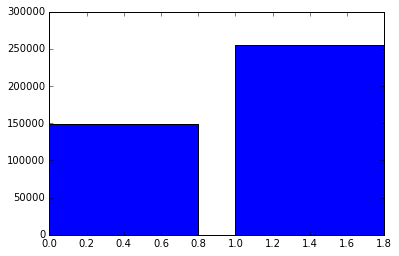

In [13]:
#Printing the percentage of duplicate questions
print train_qs['is_duplicate'].sum()/float(len(train_qs['is_duplicate']))

plt.bar(range(0,2),[train_qs['is_duplicate'].sum(),(1- train_qs['is_duplicate']).sum()] )

()


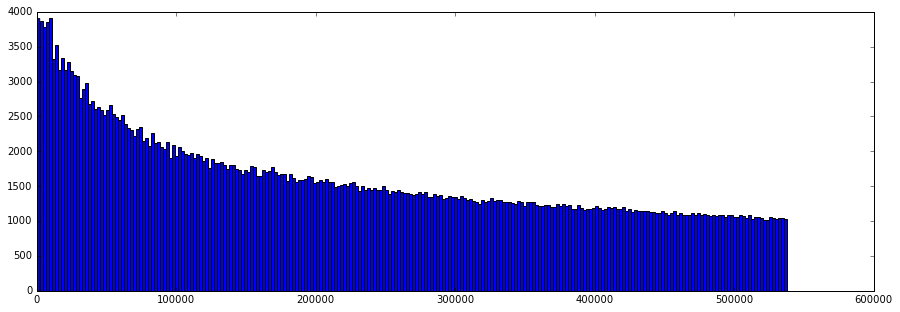

In [14]:
plt.figure(figsize=(15, 5))
plt.hist(train_qs['qid1'].tolist(), bins = 250)
print()

In [5]:
#### Training data
question1_freq = pd.DataFrame(train_qs[['id','qid1']].groupby(['qid1']).size())
question2_freq = pd.DataFrame(train_qs[['id','qid2']].groupby(['qid2']).size())

question1_freq.columns = ['q1_counts']
question2_freq.columns = ['q2_counts']

question1_freq['qid1'] = question1_freq.index
question2_freq['qid2'] = question2_freq.index

##### Test data
test_question1_freq = pd.DataFrame(test_qs[['test_id','question1']].groupby(['question1']).size())
test_question2_freq = pd.DataFrame(test_qs[['test_id','question2']].groupby(['question2']).size())

test_question1_freq.columns = ['q1_counts']
test_question2_freq.columns = ['q2_counts']

test_question1_freq['question1'] = test_question1_freq.index

test_question2_freq['question2'] = test_question2_freq.index



In [6]:
test_question1_freq.head()

,q1_counts,question1
question1,,
A tank 10m long and 5m wide has water up to a depth of 3m. What is the total area of the wet surface?,1,A tank 10m long and 5m wide has water up to a...
Can I watch a repeat of a full cricket match broadcast by the Star network in India?,2,Can I watch a repeat of a full cricket match ...
"Did you meet your significant other through serendipity, coincidences, chanced encounters or fate? Tell us your story.",1,Did you meet your significant other through s...
How do I lose contact with someone?,2,How do I lose contact with someone?
"How do I make the time lapse images using an EOS 70D, with an intervalometer?",1,How do I make the time lapse images using an ...


In [7]:
#### Train data
train_qs1 = pd.merge(train_qs,question1_freq,on = ['qid1']).sort_values(by = 'id')

train_qs2 = pd.merge(train_qs1, question2_freq, on = ['qid2']).sort_values(by = 'id')
train_qs2.index = train_qs2[['id']]

#### Test data
test_qs1 = pd.merge(test_qs, test_question1_freq, on = ['question1']).sort_values(by = 'test_id')

test_qs2 = pd.merge(test_qs1, test_question2_freq, on = ['question2']).sort_values(by = 'test_id')
test_qs2.index = test_qs2[['test_id']]

In [46]:
train_qs2.tail()

,id,qid1,qid2,question1,question2,is_duplicate,q1_counts,q2_counts,question1_clean,question2_clean,commanality_score
404285,404285,433578,379845,how many keywords are there in the racket prog...,how many keywords are there in perl programmin...,0,2,2,how many keywords are there in the racket prog...,how many keywords are there in perl programmin...,0.857143
404286,404286,18840,155606,do you believe there is life after death?,is it true that there is life after death?,1,12,1,do you believe there is life after death,is it true that there is life after death,0.666667
404287,404287,537928,537929,what is one coin?,what's this coin?,0,1,1,what is one coin,what s this coin,0.666667
404288,404288,537930,537931,what is the approx annual cost of living while...,i am having little hairfall problem but i want...,0,1,1,what is the approx annual cost of living while...,i am having little hairfall problem but i want...,0.000000
404289,404289,537932,537933,what is like to have sex with cousin?,what is it like to have sex with your cousin?,0,1,1,what is like to have sex with cousin,what is it like to have sex with your cousin,1.000000


### Does the frequency of a question affect the duplicacy

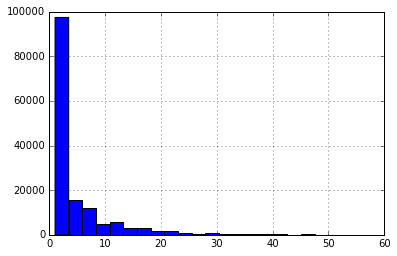

In [120]:
train_qs2[train_qs2['is_duplicate']== 1]['q1_counts'].hist(bins = 20)


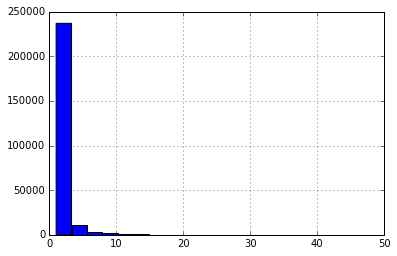

In [121]:
train_qs2[train_qs2['is_duplicate']== 0]['q1_counts'].hist(bins = 20)

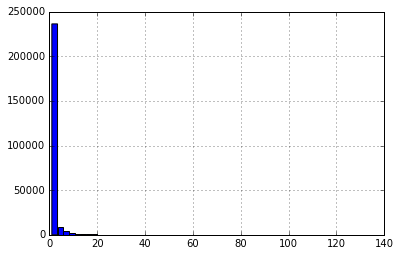

In [128]:
train_qs2[train_qs2['is_duplicate']== 0]['q2_counts'].hist(bins = 50)

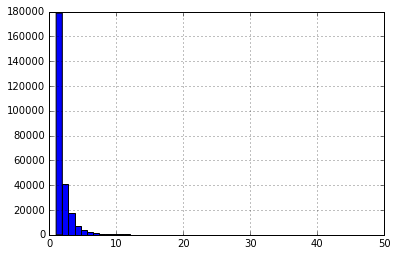

In [129]:
train_qs2[train_qs2['is_duplicate']== 0]['q1_counts'].hist(bins = 50)

In [423]:
print train_qs2[['q1_counts','is_duplicate']].groupby(['is_duplicate']).agg(['mean'])
print train_qs2[['q2_counts','is_duplicate']].groupby(['is_duplicate']).agg(['mean'])
train_qs2['average_count'] = (train_qs2['q1_counts'] + train_qs2['q2_counts'])/2
print "\n\nAverage counts"
print train_qs2[['average_count','is_duplicate']].groupby(['is_duplicate']).agg(['mean'])

             q1_counts
                  mean
is_duplicate          
0             1.661342
1             4.820264
             q2_counts
                  mean
is_duplicate          
0             1.964533
1             4.896371


Average counts
             average_count
                      mean
is_duplicate              
0                 1.812937
1                 4.858317


In [131]:
#Count : Can be used as one of the features

#### Pre-processing steps

1. Lower case
2. Removing special case - replace with space (will be helpful for tokenization)
3. Removing numbers - replace with space

In [8]:
#Lower case
train_qs2['question1_clean'] = train_qs2.question1.str.lower()
train_qs2['question2_clean'] = train_qs2.question2.str.lower()

test_qs2['question1_clean'] = test_qs2.question1.str.lower()
test_qs2['question2_clean'] = test_qs2.question2.str.lower()


In [9]:
#Replacing special characters with spaces

train_qs2['question1_clean'] = train_qs2['question1_clean'].apply(lambda x:  re.sub('[^a-zA-Z0-9 \n\.]', ' ', str(x)))
train_qs2['question2_clean'] = train_qs2['question2_clean'].apply(lambda x:  re.sub('[^a-zA-Z0-9 \n\.]', ' ', str(x)))

test_qs2['question1_clean'] = test_qs2['question1_clean'].apply(lambda x:  re.sub('[^a-zA-Z0-9 \n\.]', ' ', str(x)))
test_qs2['question2_clean'] = test_qs2['question2_clean'].apply(lambda x:  re.sub('[^a-zA-Z0-9 \n\.]', ' ', str(x)))

In [10]:
#Checking the interaction method
set_list1 = train_qs2['question1_clean'].iloc[0,].split(' ')
print set_list1
set_list2 = train_qs2['question2_clean'].iloc[0,].split(' ')
print set_list2

set(set_list1).intersection(set_list2)

['what', 'is', 'the', 'step', 'by', 'step', 'guide', 'to', 'invest', 'in', 'share', 'market', 'in', 'india', '']
['what', 'is', 'the', 'step', 'by', 'step', 'guide', 'to', 'invest', 'in', 'share', 'market', '']


{'',
 'by',
 'guide',
 'in',
 'invest',
 'is',
 'market',
 'share',
 'step',
 'the',
 'to',
 'what'}

In [11]:
stop_words = set(stopwords.words('english'))
stop_words.add('')

#Remove 'it' from stop words

### Feature Engineering

1. Similar word feature
2. TF-IDF feature
3. Word match ratio (fuzzy-wuzzy) feature
4. Extracting numbers and find pattern

In [12]:
def similar_word_percetage(row, columns):
    
    q1 = row[columns[0]].split(' ')
    q2 = row[columns[1]].split(' ')
    
    q1 = [each for each in q1 if each not in stop_words]
    q2 = [each for each in q2 if each not in stop_words]
    
    if float(len(q1) + len(q2)) == 0:
        return 0
    
    intersection = set(q1).intersection(q2)
        
    common_words = 2 * len(intersection) / float(len(q1) + len(q2))
    return common_words

In [13]:
#Calling the function to create a commanality score column ! 
columns = ['question1_clean','question2_clean']
train_qs2['commanality_score'] = train_qs2.apply(lambda x: similar_word_percetage(x,columns), axis = 1)



In [14]:
#Calling the function for test data !

test_qs2['commanality_score'] = test_qs2.apply(lambda x: similar_word_percetage(x,columns), axis = 1)


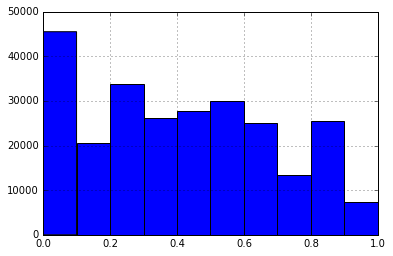

In [400]:
train_qs2[train_qs2['is_duplicate'] == 0]['commanality_score'].hist()

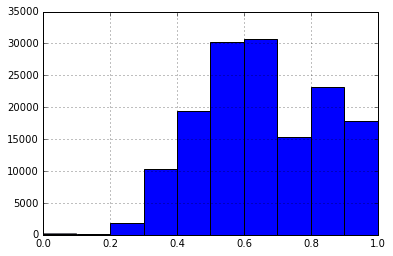

In [401]:
train_qs2[train_qs2['is_duplicate'] == 1]['commanality_score'].hist()

#### A good feature where it can be seen that the commality is most than around 0.3 for duplicated records

In [33]:
train_qs.sort_values(by = ['id'])
train_qs2.sort_values(by = ['id'])


#t = train_qs[(train_qs2['commanality_score'] > 0.8) & (train_qs2['is_duplicate'] == 0)].sort_values(by = ['id'])
t2 = train_qs2[(train_qs2['commanality_score'] > 0.4) & (train_qs2['is_duplicate'] == 0)].sort_values(by = ['id'])
t3 = train_qs2[(train_qs2['commanality_score'] > 0.4) & (train_qs2['is_duplicate'] == 1)].sort_values(by = ['id'])


In [34]:
#train_qs.loc[((train_qs2['commanality_score'] > 0.8) & (train_qs2['is_duplicate'] == 0)),:]
train_qs= pd.DataFrame(train_qs)
#train_qs.loc[(train_qs2['commanality_score'] > 0.8) & (train_qs2['is_duplicate'] == 0),:]
#train_qs2[(train_qs2['commanality_score'] > 0.8) & (train_qs2['is_duplicate'] == 0)]

In [45]:
for i in range(0,200):
    print t3.iloc[i,]['question1']
    print t3.iloc[i,]['question2']
    print t3.iloc[i,]['commanality_score']

    
#Observations - stemming and lammetisation
#Check for the sentences with just extra words like 'my'
#Reduce the score for those with just one word mistmatch - mostly company name and the nation name - lookout for that one word
### if that is a grammatical word (do, does, a, an) then it is a match else, it is duplicate
#Check few extra words/phrase in a question, while every other part in both the question exactly matches
#It is better to replace special charaters with '' than ' '
#Spell check
#Singular plural check

### Number comparison
# 60000, 60k are equal
# roman numerals and numbers

### Run a basic model, cull out the wrongly matched records and check the reason

astrology: i am a capricorn sun cap moon and cap rising...what does that say about me?
i'm a triple capricorn (sun, moon and ascendant in capricorn) what does this say about me?
0.533333333333
how can i be a good geologist?
what should i do to be a great geologist?
0.5
how do i read and find my youtube comments?
how can i see all my youtube comments?
0.571428571429
what can make physics easy to learn?
how can you make physics easy to learn?
1.0
what was your first sexual experience like?
what was your first sexual experience?
0.857142857143
what does manipulation mean?
what does manipulation means?
0.5
why are so many quora users posting questions that are readily answered on google?
why do people ask quora questions which can be answered easily by google?
0.533333333333
why do rockets look white?
why are rockets and boosters painted white?
0.571428571429
how should i prepare for ca final law?
how one should know that he/she completely prepare for ca final exam?
0.545454545455
what are

In [44]:
print t2.iloc[35,]['question1']
print t2.iloc[35,]['question2']

#Reasons for different high similarity even though not duplicate
#Addition of a country
#Importance to numbers and special characters
#More specification to the same sentence 
    #Example:
    #why do i always get depressed 
    #why do i always get depressed in the evening 
# Order of the sentence matters 
    #Example 
    #how do i switch from apple music to spotify 
    #should i switch from spotify to apple music 
#Just the change in brand name in a question
#Meaning with how and why changes - change the stopword recognizer accordingly

## Many cases with just a single word difference
## What you can do is, for words with high match, check word by word until there is a single word change, continue looking ahead
   #and see if the words following that are the same

# Create a feature called country and extract the country form the dataset    

what were the war strategies of the union and the confederates during the civil war?
how could the confederates have possibly defeated union forces at gettysburg during the american civil war?


In [501]:
print t3.iloc[10,]['question1']
print t3.iloc[10,]['question2']


how do i use twitter as a business source 
how can i use twitter for business 


### tf-idf feature creation

In [33]:
#train_qs2.head()

#train_qs2[['question1_clean']].apply(lambda x: x.tolist(), axis=1)

In [36]:
question_series = pd.Series(train_qs2['question1_clean'].tolist() + train_qs2['question1_clean'].tolist()).astype(str)

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1)
vectorizer.fit_transform(question_series)

<808580x67339 sparse matrix of type '<type 'numpy.float64'>'
	with 8061886 stored elements in Compressed Sparse Row format>

In [54]:
idf = vectorizer._tfidf.idf_
idf_dict =  dict(zip(vectorizer.get_feature_names(), idf))

In [74]:
## Analysing the words-and tf-idf scores
tf_idf_weights = pd.DataFrame.from_dict(idf_dict.items())
tf_idf_weights.columns = ['words','tf_idf score']

In [79]:
tf_idf_weights.sort_values(by = ['tf_idf score'])

,words,tf_idf score
48592,what,1.932742
63676,the,1.971764
21111,is,2.154115
50861,how,2.323318
21150,in,2.505323
35751,to,2.527556
62265,do,2.671183
31989,of,2.724295
58400,are,2.741491
30940,and,2.883788


## Submisson

In [263]:
test_qs.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [279]:
submission = pd.DataFrame(test_qs['test_id'])
submission['is_duplicate'] = train_qs['is_duplicate'].mean()
submission.to_csv('submission_2.csv',index=False)

0.369197853026293